In [5]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [56]:
train_datata = pd.read_excel("C:/Users/Sujeevan/Desktop/Airline Price Prediction/Flight_Price_resources/Data_train.xlsx")

In [303]:
train_datata.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [58]:
train_datata['Total_Stops'].unique

<bound method Series.unique of 0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10683, dtype: object>

In [283]:
train_datata.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
train_datata.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [329]:
train_datata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [60]:
train_datata.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [307]:
train_datata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [333]:
train_datata['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10682, dtype: bool

In [309]:
train_datata[train_datata['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [62]:
train_datata.dropna(inplace=True)

In [337]:
train_datata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [64]:
train_datata.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [42]:
train_datata.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.2 MB


In [66]:
data = train_datata.copy()

In [371]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [373]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [73]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [68]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [18]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [70]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_datetime(feature)

C:\Users\Sujeevan\AppData\Local\Temp\ipykernel_22480\1990600865.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\Sujeevan\AppData\Local\Temp\ipykernel_22480\1990600865.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\Sujeevan\AppData\Local\Temp\ipykernel_22480\1990600865.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col])


In [381]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [383]:
data["Journey-day"] = data['Date_of_Journey'].dt.day

In [385]:
data["Journey-month"] = data['Date_of_Journey'].dt.month

In [72]:
data["Journey-year"] = data['Date_of_Journey'].dt.year

In [74]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey-year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-13 05:50:00,2025-02-13 13:15:00,7h 25m,2 stops,No info,7662,2019


In [76]:
def extract_hour_min(df,col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df.head(2)

In [48]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [78]:
extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey-year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-13 05:50:00,2025-02-13 13:15:00,7h 25m,2 stops,No info,7662,2019,13,15


In [80]:
extract_hour_min(data,'Dep_Time')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey-year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-13 05:50:00,2025-02-13 13:15:00,7h 25m,2 stops,No info,7662,2019,13,15,5,50


In [399]:
cols_to_drop = ['Dep_Time', 'Arrival_Time']
data.drop(cols_to_drop, axis = 1, inplace = True)

In [401]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey-day,Journey-month,Journey-year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [403]:
data.shape

(10682, 16)

In [84]:
def flight_dep_time(x):
    if (x>4) and (x>=8):
        return "Early morning"
    elif (x>8) and (x>=12):
        return "morning"
    elif (x>12) and (x>=16):
        return "Noon"
    elif (x>16) and (x>=20):
        return "Evening"
    elif (x>20) and (x>=24):
        return "Night"
    else:
        return "late night"

In [86]:
data['Dep_Time_hour'].apply(flight_dep_time)

0        Early morning
1           late night
2        Early morning
3        Early morning
4        Early morning
             ...      
10678    Early morning
10679    Early morning
10680    Early morning
10681    Early morning
10682    Early morning
Name: Dep_Time_hour, Length: 10682, dtype: object

<Axes: xlabel='Dep_Time_hour'>

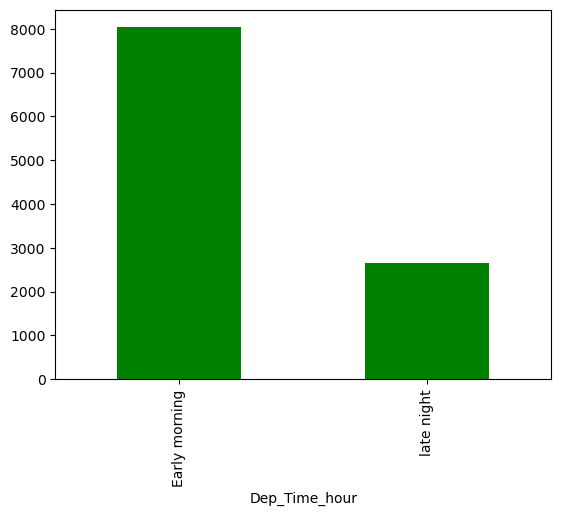

In [165]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar",color="g")

In [167]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68721 sha256=fe4ae471def68f0547a8a12408a91cdcecfa9ce9b48c4704b86ca9b07c6d4b83
  Stored in directory: c:\users\sujeevan\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3b79f6cf66f7a
Successfully built cufflinks


In [3]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected =True)
cf.go_offline()

In [91]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [96]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + '' + x
    elif 'm' not in x:
        x = x + '' + '0m'

    return x

In [98]:
data['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2         19h0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680      3h0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [180]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [100]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [190]:
data['Duration'][0]

'2h 50m'

In [194]:
'2h 50m'.split(' ')

['2h', '50m']

In [196]:
'2h 50m'.split(' ')[0]

'2h'

In [200]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [202]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [206]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [102]:
data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: int64

In [106]:
data['duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [108]:
data['duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

IndexError: list index out of range

In [110]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey-year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,duration_hours
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,1,10,22,20,2
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-13 05:50:00,2025-02-13 13:15:00,7h 25m,2 stops,No info,7662,2019,13,15,5,50,7


In [216]:
import re

data['duration_hours'] = data['Duration'].apply(lambda x: int(re.search(r'(\d+)h', x).group(1)) if re.search(r'(\d+)h', x) else 0)


In [218]:


data['duration_mins'] = data['Duration'].apply(lambda x: int(re.search(r'(\d+)m', x).group(1)) if re.search(r'(\d+)m', x) else 0)


In [220]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journer-day,Journey-year,Journey-month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,duration_hours,duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,2019,3,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,13,15,5,50,7,25


In [222]:
'2*60'

'2*60'

In [224]:
eval('2*60')

120

In [34]:
data['Duration'].str.replace('h','*60').str.replace(' ' , '+').str.replace('m' , '*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10683, dtype: int64

In [36]:
data['Duration_total_min'] = data['Duration'].str.replace('h','*60').str.replace(' ' , '+').str.replace('m' , '*1').apply(eval)

In [38]:
data['Duration_total_min']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_min, Length: 10683, dtype: int64

In [44]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_total_min'],
      dtype='object')

<Axes: xlabel='Duration_total_min', ylabel='Price'>

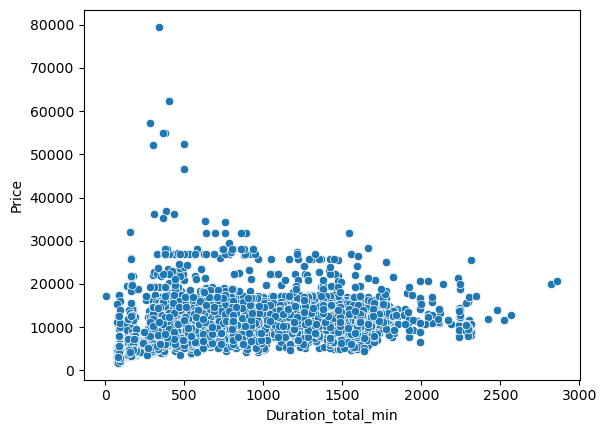

In [52]:
sns.scatterplot(x='Duration_total_min', y='Price', data=data)


<Axes: xlabel='Duration_total_min', ylabel='Price'>

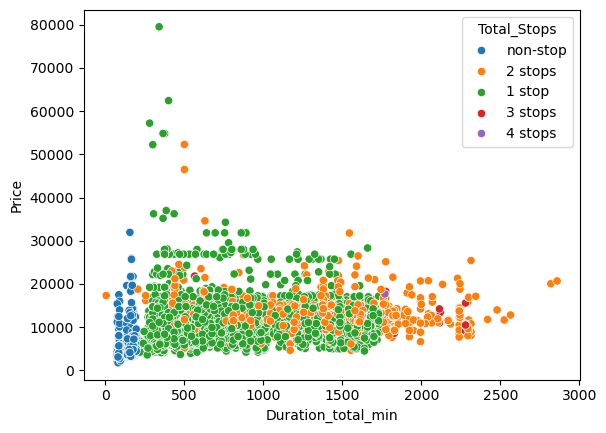

In [54]:
sns.scatterplot(x='Duration_total_min', y='Price',hue='Total_Stops', data=data)

In [56]:
data['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object

In [58]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10683, dtype: bool

In [60]:
data[data['Airline']=='Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_total_min
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,930
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1265
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,1530
13,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 10 May,12h 10m,1 stop,In-flight meal not included,9663,730
...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JDH → BOM → COK,11:40,19:00,7h 20m,2 stops,No info,21219,440
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150,1195
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704,900
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087,1485


In [66]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values()

Route
DEL → CCU → BOM → COK      1
BOM → DED → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BLR → BOM → JDH → DEL      3
CCU → BOM → PNQ → BLR      4
BOM → DEL → HYD            5
DEL → UDR → BOM → COK      7
BLR → BDQ → DEL            8
BLR → MAA → DEL           10
DEL → IXC → BOM → COK     13
DEL → MAA → BOM → COK     16
CCU → GAU → BLR           22
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → COK                 34
DEL → ATQ → BOM → COK     38
DEL → NAG → BOM → COK     61
DEL → IDR → BOM → COK     86
DEL → AMD → BOM → COK    141
BOM → HYD                207
DEL → JAI → BOM → COK    207
CCU → DEL → BLR          300
BLR → DEL                382
BLR → BOM → DEL          385
DEL → BOM → COK          875
CCU → BOM → BLR          930
dtype: int64

In [72]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [74]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_total_min'],
      dtype='object')

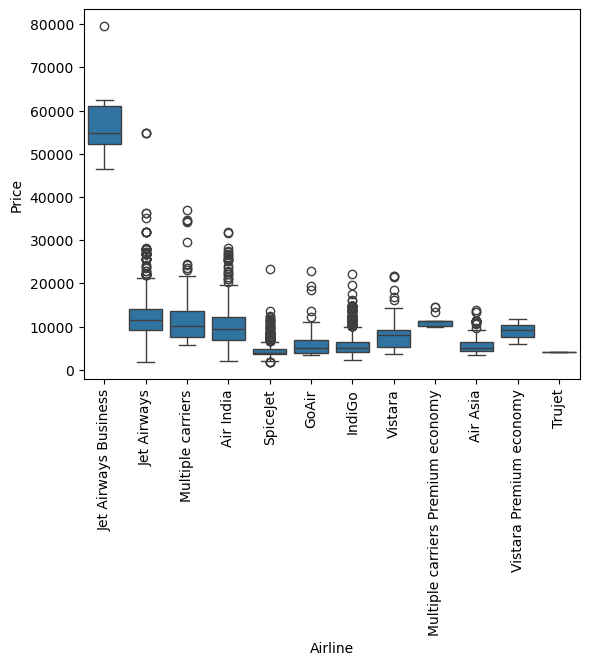

In [102]:
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')
plt.show()

In [110]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [112]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [114]:
cat_col 

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [116]:
num_col

['Price', 'Duration_total_min']

In [122]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [124]:
for sub_category in data["Source"].unique():
    data['Source_'+sub_category] = data["Source"].apply(lambda x: 1 if x==sub_category else 0)

In [126]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,1,0,0,0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,0,1,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,0,0,1,0,0


In [112]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [114]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [144]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [118]:
dict_airlines = {key:index for index,key in enumerate(airlines,0)}

In [457]:
dict_airlines 

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [120]:
data['Airline'] = data['Airline'].map(dict_airlines )

In [461]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [154]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,1,0,0,0,0
1,7,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,0,1,0,0,0


In [122]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [160]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

C:\Users\Sujeevan\AppData\Local\Temp\ipykernel_3700\1369411936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Destination'].replace('New Delhi', 'Delhi', inplace=True)


In [162]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [126]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [166]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [128]:
dict_dest = {key:index for index,key in enumerate(dest,0)}

In [172]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [451]:
data['Destination'] = data['Destination'].map(dict_dest)

In [176]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10683, dtype: int64

In [178]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,24/03/2019,Banglore,2,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,1,0,0,0,0
1,7,1/05/2019,Kolkata,3,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,0,1,0,0,0


In [245]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_total_min', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [405]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [409]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [411]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [415]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [417]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [419]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey-day',
       'Journey-month', 'Journey-year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute'],
      dtype='object')

In [130]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [429]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey-day,Journey-month,Journey-year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [431]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey-day',
       'Journey-month', 'Journey-year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute'],
      dtype='object')

In [437]:
data.drop(columns =['Date_of_Journey','Additional_Info','Source','Journey-year'],axis = 1,inplace = True)

In [439]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey-day', 'Journey-month', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute'],
      dtype='object')

In [441]:
data.head()

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey-day,Journey-month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,New Delhi,BLR → DEL,2h 50m,0,3897,24,3,1,10,22,20
1,Air India,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,13,15,5,50
2,Jet Airways,Cochin,DEL → LKO → BOM → COK,19h,2,13882,9,6,4,25,9,25
3,IndiGo,Banglore,CCU → NAG → BLR,5h 25m,1,6218,12,5,23,30,18,5
4,IndiGo,New Delhi,BLR → NAG → DEL,4h 45m,1,13302,1,3,21,35,16,50


In [443]:
data.drop(columns = ['Route','Duration'],axis =1 , inplace =True)

In [463]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey-day,Journey-month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,3,5,0,3897,24,3,1,10,22,20
1,7,3,2,7662,1,5,13,15,5,50


In [136]:
def plot(df , col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)
    sns.distplot(df[col],ax = ax3,kde=False)
    

C:\Users\Sujeevan\AppData\Local\Temp\ipykernel_22480\3523723999.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Sujeevan\AppData\Local\Temp\ipykernel_22480\3523723999.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




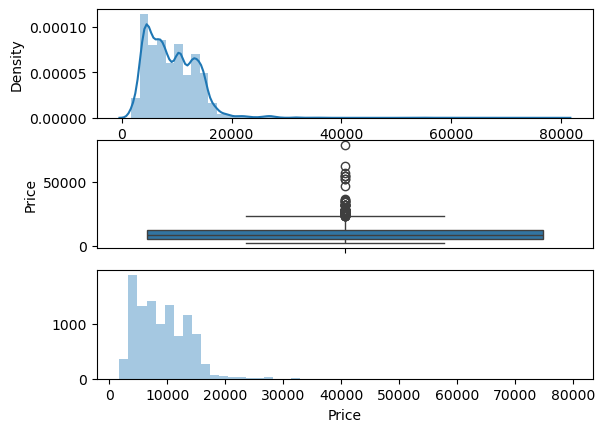

In [138]:
plot(data,'Price')


In [140]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3-q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [487]:
print(maximum)

23017.0


In [489]:
print(minimum)

-5367.0


In [497]:
print([price for price in data['Price'] if price > maximum or price < minimum])


[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [501]:
len([price for price in data['Price'] if price > maximum or price < minimum])

94

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [20]:
data['Price'] = np.where(data['Price'] >= 35000,data['Price'].median(),data['Price'])

C:\Users\Sujeevan\AppData\Local\Temp\ipykernel_22480\3523723999.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Sujeevan\AppData\Local\Temp\ipykernel_22480\3523723999.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




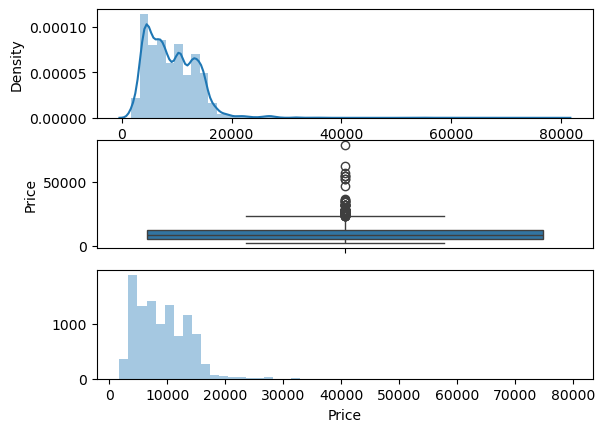

In [142]:
plot(data,'Price')

In [24]:
x = data.drop(['Price'],axis =1)

In [28]:
y = data['Price']

In [30]:
from sklearn.feature_selection import mutual_info_regression

In [1]:
imp = mutual_info_regression(x,y)


NameError: name 'mutual_info_regression' is not defined

In [146]:
imp

NameError: name 'imp' is not defined

In [152]:
imp_df = pd.DataFrame(imp,index = x.columns)

NameError: name 'imp' is not defined

In [154]:
imp_df.columns = ['importance']

NameError: name 'imp_df' is not defined

In [156]:
imp_df

NameError: name 'imp_df' is not defined

In [158]:
imp_df.sort_values(by = 'importance',ascending = False)

NameError: name 'imp_df' is not defined